In [1]:
#ebelin 9.6

from sympy import *
init_session()
from sympy.stats import *
import matplotlib.pyplot as plt
import numpy as np

F, a, b, R, mttf, l =symbols('F a b R mttf l')

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
f=0.001
mttf=integrate(0.001*t,(t,0,1000))
mttf #a)

In [3]:
#b) determine the mttf if preventive maintenance will restore the system to as good as new every 100h
R=1-integrate(0.001,t)
R
mttf_M=integrate(R,(t,0,100))/(1-R.subs({t:100}))
mttf_M

In [11]:
#c)compare the reliability with and without maintenance at 225h with 100h maintenance interval.
t1=225
T=100
F_m=0.01 #falha durante manutenção
n=t1//T
R225_M= (R**n).subs({t:T})*(R.subs({t:(t1-n*T)}))*(1-F_m)**n
R225_M#confiabilidade com manutenção preventiva a cada 225h


In [12]:
R225=R.subs({t:225})
R225#confiabilidade sem manutenção preventiva
#resposta: a confiabilidade não é modificada ao inserir uma manutenção preventiva a cada 100h.

In [7]:
n

In [13]:
#d)Is there significant improvement if maintenance interval is 50h?
T=50
R225_M50= (R**n).subs({t:T})*(R.subs({t:(t1-n*T)}))*(1-F_m)**n
R225_M50 
#resposta: sem melhora significante.

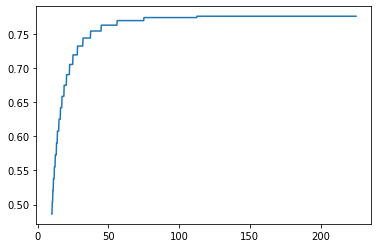

In [10]:
k=np.linspace(10,225,1000)
def predict(Tk):
    n=t1//Tk
    return (R**n).subs({t:T})*(R.subs({t:(t1-n*T)}))*(1-F_m)**n
predict_v=np.vectorize(predict)
plt.plot(k,predict_v(k))